# Random Forest model
This Random Forest model predicts superconductor critical temperatures. The first model uses default parameters

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
superconductor_df = pd.read_csv('../datasets/train.csv')

superconductor_df.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [3]:
superconductor_df.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000
mean,4.115224,87.557631,72.988310,71.290627,58.539916,1.165608,1.063884,115.601251,33.225218,44.391893,...,3.153127,3.056536,3.055885,1.295682,1.052841,2.041010,1.483007,0.839342,0.673987,34.421219
std,1.439295,29.676497,33.490406,31.030272,36.651067,0.364930,0.401423,54.626887,26.967752,20.035430,...,1.191249,1.046257,1.174815,0.393155,0.380291,1.242345,0.978176,0.484676,0.455580,34.254362
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000210
25%,3.000000,72.458076,52.143839,58.041225,35.248990,0.966676,0.775363,78.512902,16.824174,32.890369,...,2.116732,2.279705,2.091251,1.060857,0.775678,1.000000,0.921454,0.451754,0.306892,5.365000
50%,4.000000,84.922750,60.696571,66.361592,39.918385,1.199541,1.146783,122.906070,26.636008,45.123500,...,2.618182,2.615321,2.434057,1.368922,1.166532,2.000000,1.063077,0.800000,0.500000,20.000000
75%,5.000000,100.404410,86.103540,78.116681,73.113234,1.444537,1.359418,154.119320,38.356908,59.322812,...,4.026201,3.727919,3.914868,1.589027,1.330801,3.000000,1.918400,1.200000,1.020436,63.000000
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,7.000000,7.000000,7.000000,2.141963,1.949739,6.000000,6.992200,3.000000,3.000000,185.000000


In [4]:
superconductor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

## Regression part 1
#### Create the regression model

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [6]:
#set up X and y
X = superconductor_df.drop(columns=['critical_temp'])
y = superconductor_df['critical_temp']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [7]:
#instantiate scaler and scale data
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [8]:
#instantiate and fit the model
linreg = LinearRegression()
linreg.fit(X_train_sc,y_train)

LinearRegression()

In [9]:
#make predictions
y_preds = linreg.predict(X_test_sc)

In [10]:
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_preds))
mae = metrics.mean_absolute_error(y_test,y_preds)
mape = metrics.mean_absolute_percentage_error(y_test,y_preds)
ex_var = metrics.explained_variance_score(y_test,y_preds)
r2_score = metrics.r2_score(y_test,y_preds)

In [11]:
print(f"Root Mean Squared Error:	{np.round(rmse,2)} Kelvins")
print(f"Mean Absolute Error:		{np.round(mae,2)} Kelvins")
print(f"Mean Abs. Percent Error:	{np.round(mape,2)}%")
print(f"Explained Variance Score:	{np.round(ex_var,4)}")
print(f"R2 Score:			{np.round(r2_score,4)}")

Root Mean Squared Error:	17.66 Kelvins
Mean Absolute Error:		13.33 Kelvins
Mean Abs. Percent Error:	7.69%
Explained Variance Score:	0.7343
R2 Score:			0.7343


Text(0.5, 1.0, 'Relationship between predicted and actual critical temperatures')

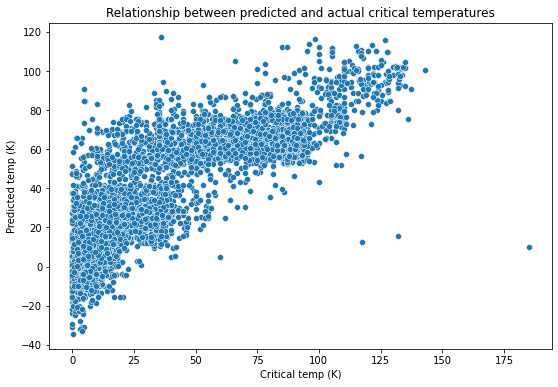

In [12]:
plt.figure(figsize=(9,6))
sns.scatterplot(x=y_test,y=y_preds)
plt.xlabel('Critical temp (K)')
plt.ylabel('Predicted temp (K)')
plt.title('Relationship between predicted and actual critical temperatures')

### Principal Component Analysis
##### (still part 1)

Let's reduce the number of dimensions and see what effect it has on the results

In [13]:
from sklearn.decomposition import PCA

In [14]:
#instantiate PCA with enough dimensions to capture 95% of explained variance
pca = PCA(0.95)
pca.fit(X_train_sc)

PCA(n_components=0.95)

In [15]:
X_train_pca = pca.transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)

print(f"The number of features is reduced from {X_train_sc.shape[1]} to {X_train_pca.shape[1]}")

The number of features is reduced from 81 to 17


In [16]:
#instantiate and fit regression model
linreg = LinearRegression()
linreg.fit(X_train_pca, y_train)

LinearRegression()

In [19]:
#make predictions
pca_preds = linreg.predict(X_test_pca)

In [20]:
#scoring metrics
rmse = np.sqrt(metrics.mean_squared_error(y_test,pca_preds))
mae = metrics.mean_absolute_error(y_test,pca_preds)
mape = metrics.mean_absolute_percentage_error(y_test,pca_preds)
ex_var = metrics.explained_variance_score(y_test,pca_preds)
r2_score = metrics.r2_score(y_test,pca_preds)

In [21]:
print("\nUpdated scoring metrics with reduced dimensions:\n")
print(f"Root Mean Squared Error: 	{np.round(rmse,2)} Kelvins")
print(f"Mean Absolute Error:		{np.round(mae,2)} Kelvins")
print(f"Mean Abs. Percent Error:	{np.round(mape,2)}%")
print(f"Explained Variance Score:	{np.round(ex_var,4)}")
print(f"R2 Score:			{np.round(r2_score,4)}")



Updated scoring metrics with reduced dimensions:

Root Mean Squared Error: 	21.67 Kelvins
Mean Absolute Error:		17.05 Kelvins
Mean Abs. Percent Error:	19.13%
Explained Variance Score:	0.5999
R2 Score:			0.5998


Text(0.5, 1.0, 'Relationship between predicted and actual critical temperatures (PCA)')

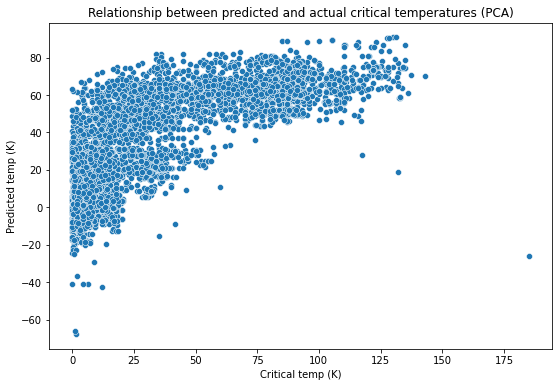

In [22]:
plt.figure(figsize=(9,6))
sns.scatterplot(x=y_test,y=pca_preds)
plt.xlabel('Critical temp (K)')
plt.ylabel('Predicted temp (K)')
plt.title('Relationship between predicted and actual critical temperatures (PCA)')

## Regression part 2
#### Elements dataset
Now we run identical experiments on the next dataset, which gives us the detailed element-by-element makeup of every superconductor at the atomic level.  This dataset has a 1-to-1 correspondence with the prior dataset, and in theory they could be merged into one mega-DataFrame

In [3]:
elements_df = pd.read_csv('../datasets/unique_m.csv')

elements_df.head()

,H,He,Li,Be,B,C,N,O,F,Ne,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,29.0,Ba0.2La1.8Cu1O4
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,26.0,Ba0.1La1.9Ag0.1Cu0.9O4
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,19.0,Ba0.1La1.9Cu1O4
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,22.0,Ba0.15La1.85Cu1O4
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,23.0,Ba0.3La1.7Cu1O4


In [24]:
elements_df.describe()

,H,He,Li,Be,B,C,N,O,F,Ne,...,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp
count,21263.000000,21263.0,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.0,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.0,21263.0,21263.0,21263.000000
mean,0.017685,0.0,0.012125,0.034638,0.142594,0.384968,0.013284,3.009129,0.014874,0.0,...,0.034108,0.020535,0.036663,0.047954,0.042461,0.201009,0.0,0.0,0.0,34.421219
std,0.267220,0.0,0.129552,0.848541,1.044486,4.408032,0.150427,3.811649,0.132119,0.0,...,0.307888,0.717975,0.205846,0.272298,0.274365,0.655927,0.0,0.0,0.0,34.254362
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000210
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,5.365000
50%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,20.000000
75%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,6.800000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,63.000000
max,14.000000,0.0,3.000000,40.000000,105.000000,120.000000,12.800000,66.000000,4.000000,0.0,...,5.800000,64.000000,8.000000,7.000000,19.000000,14.000000,0.0,0.0,0.0,185.000000


In [25]:
elements_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 88 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   H              21263 non-null  float64
 1   He             21263 non-null  int64  
 2   Li             21263 non-null  float64
 3   Be             21263 non-null  float64
 4   B              21263 non-null  float64
 5   C              21263 non-null  float64
 6   N              21263 non-null  float64
 7   O              21263 non-null  float64
 8   F              21263 non-null  float64
 9   Ne             21263 non-null  int64  
 10  Na             21263 non-null  float64
 11  Mg             21263 non-null  float64
 12  Al             21263 non-null  float64
 13  Si             21263 non-null  float64
 14  P              21263 non-null  float64
 15  S              21263 non-null  float64
 16  Cl             21263 non-null  float64
 17  Ar             21263 non-null  int64  
 18  K     

In [26]:
#notice we're dropping TWO columns from X

X = elements_df.drop(columns=['critical_temp','material'])
y = elements_df['critical_temp']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [27]:
#instantiate scaler and scale data
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [28]:
#instantiate and fit the model
linreg = LinearRegression()
linreg.fit(X_train_sc,y_train)

LinearRegression()

In [29]:
#make predictions
y_preds = linreg.predict(X_test_sc)

In [30]:
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_preds))
mae = metrics.mean_absolute_error(y_test,y_preds)
mape = metrics.mean_absolute_percentage_error(y_test,y_preds)
ex_var = metrics.explained_variance_score(y_test,y_preds)
r2_score = metrics.r2_score(y_test,y_preds)

In [31]:
print(f"Root Mean Squared Error:	{np.round(rmse,2)} Kelvins")
print(f"Mean Absolute Error:		{np.round(mae,2)} Kelvins")
print(f"Mean Abs. Percent Error:	{np.round(mape,2)}%")
print(f"Explained Variance Score:	{np.round(ex_var,4)}")
print(f"R2 Score:			{np.round(r2_score,4)}")

Root Mean Squared Error:	21.54 Kelvins
Mean Absolute Error:		15.77 Kelvins
Mean Abs. Percent Error:	17.01%
Explained Variance Score:	0.6115
R2 Score:			0.6115


Text(0.5, 1.0, 'Relationship between predicted and actual critical temperatures (elements)')

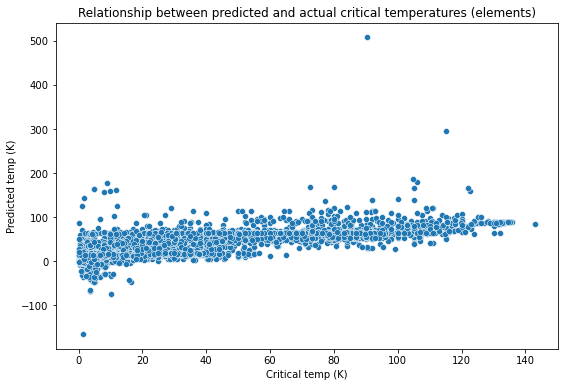

In [32]:
plt.figure(figsize=(9,6))
sns.scatterplot(x=y_test,y=y_preds)
plt.xlabel('Critical temp (K)')
plt.ylabel('Predicted temp (K)')
plt.title('Relationship between predicted and actual critical temperatures (elements)')

### Principal Component Analysis
##### (still part 2)

Let's reduce the number of dimensions and see what effect it has on the results

In [33]:
#instantiate PCA with enough dimensions to capture 95% of explained variance
pca = PCA(0.95)
pca.fit(X_train_sc)

PCA(n_components=0.95)

In [34]:
X_train_pca = pca.transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)

print(f"The number of features is reduced from {X_train_sc.shape[1]} to {X_train_pca.shape[1]}")

The number of features is reduced from 86 to 66


In [35]:
#instantiate and fit the model
linreg = LinearRegression()
linreg.fit(X_train_pca, y_train)

LinearRegression()

In [38]:
#make predictions
pca_preds = linreg.predict(X_test_pca)

rmse = np.sqrt(metrics.mean_squared_error(y_test,pca_preds))
mae = metrics.mean_absolute_error(y_test,pca_preds)
mape = metrics.mean_absolute_percentage_error(y_test,pca_preds)
ex_var = metrics.explained_variance_score(y_test,pca_preds)
r2_score = metrics.r2_score(y_test,pca_preds)

In [39]:
print("\nUpdated scoring metrics with reduced dimensions:\n")
print(f"Root Mean Squared Error: 	{np.round(rmse,2)} Kelvins")
print(f"Mean Absolute Error:		{np.round(mae,2)} Kelvins")
print(f"Mean Abs. Percent Error:	{np.round(mape,2)}%")
print(f"Explained Variance Score:	{np.round(ex_var,4)}")
print(f"R2 Score:			{np.round(r2_score,4)}")


Updated scoring metrics with reduced dimensions:

Root Mean Squared Error: 	23.13 Kelvins
Mean Absolute Error:		16.82 Kelvins
Mean Abs. Percent Error:	19.53%
Explained Variance Score:	0.5521
R2 Score:			0.552


Text(0.5, 1.0, 'Relationship between predicted and actual critical temperatures (elements PCA)')

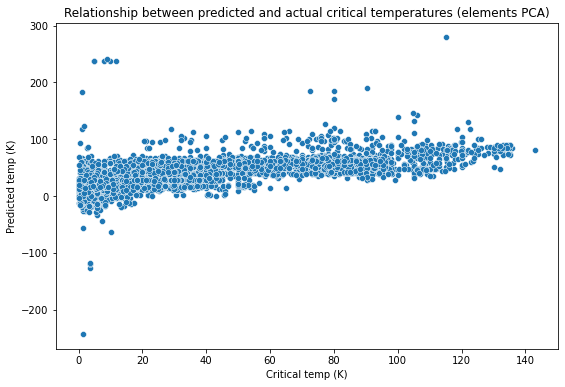

In [40]:
plt.figure(figsize=(9,6))
sns.scatterplot(x=y_test,y=pca_preds)
plt.xlabel('Critical temp (K)')
plt.ylabel('Predicted temp (K)')
plt.title('Relationship between predicted and actual critical temperatures (elements PCA)')